In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
new_pieman_word = niidb.FMriActivationsDb('data/new_pieman_word.db',
                                          mask='/home/eli/Documents/new_pieman/word/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(new_pieman_word.all(), mask='/home/eli/Documents/new_pieman/word/wholebrain.nii.gz', num_factors=10, embedding_dim=2)

In [6]:
losses = dtfa.train(num_steps=100, learning_rate=1e-1, log_level=logging.INFO, num_particles=1,
                    batch_size=128, use_cuda=True, checkpoint_steps=10)

04/24/2018 10:44:26 [Epoch 1] (5522ms) Posterior free-energy 9.11617966e+10
04/24/2018 10:44:26 Saving checkpoint...
04/24/2018 10:44:30 [Epoch 2] (3608ms) Posterior free-energy 4.44367421e+10
04/24/2018 10:44:34 [Epoch 3] (3624ms) Posterior free-energy 4.75483668e+10
04/24/2018 10:44:38 [Epoch 4] (3632ms) Posterior free-energy 3.82723891e+10
04/24/2018 10:44:41 [Epoch 5] (3667ms) Posterior free-energy 3.98744863e+10
04/24/2018 10:44:45 [Epoch 6] (3596ms) Posterior free-energy 3.81066404e+10
04/24/2018 10:44:48 [Epoch 7] (3540ms) Posterior free-energy 3.60130519e+10
04/24/2018 10:44:52 [Epoch 8] (3548ms) Posterior free-energy 3.57832253e+10
04/24/2018 10:44:56 [Epoch 9] (3659ms) Posterior free-energy 3.60758395e+10
04/24/2018 10:44:59 [Epoch 10] (3604ms) Posterior free-energy 3.60782111e+10
04/24/2018 10:45:03 [Epoch 11] (3562ms) Posterior free-energy 3.58270403e+10
04/24/2018 10:45:03 Saving checkpoint...
04/24/2018 10:45:06 [Epoch 12] (3582ms) Posterior free-energy 3.56040827e+10
04/

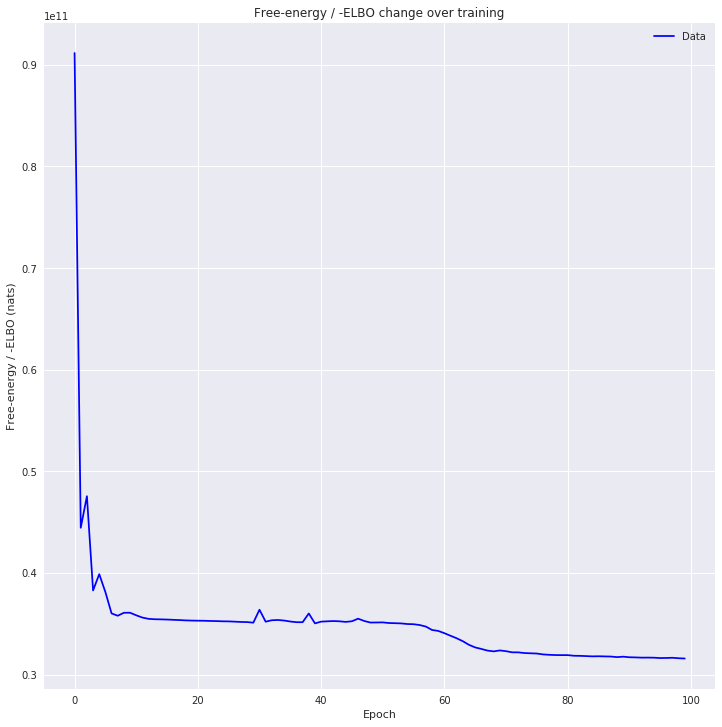

In [7]:
utils.plot_losses(losses)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


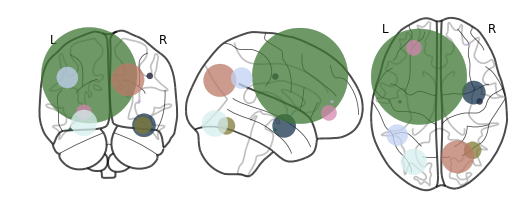

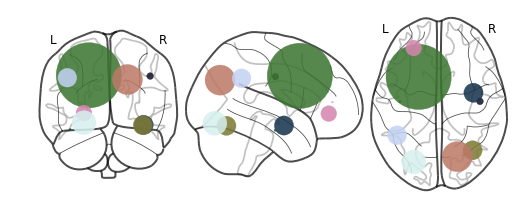

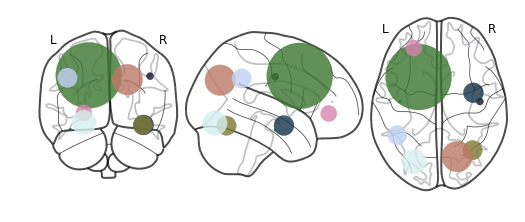

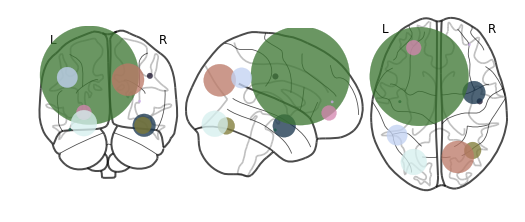

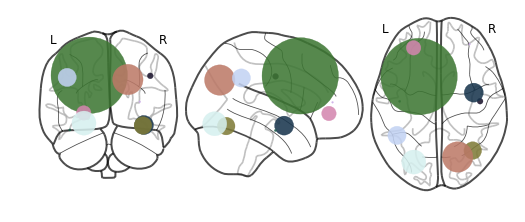

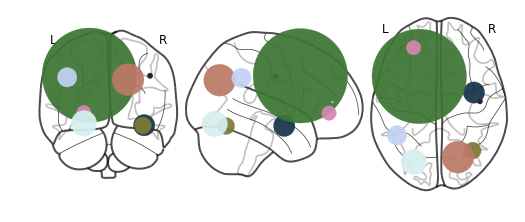

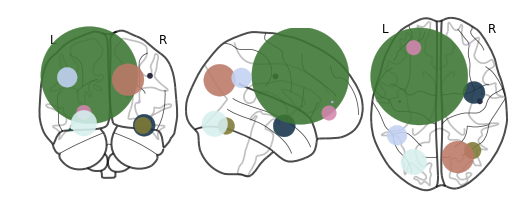

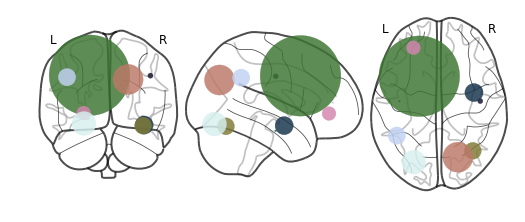

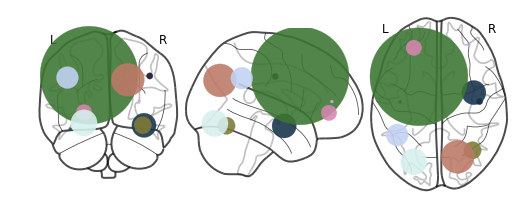

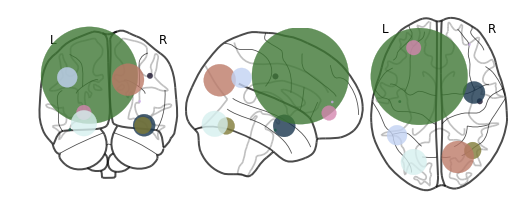

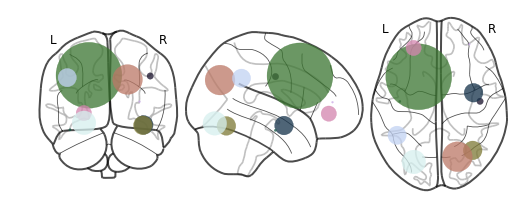

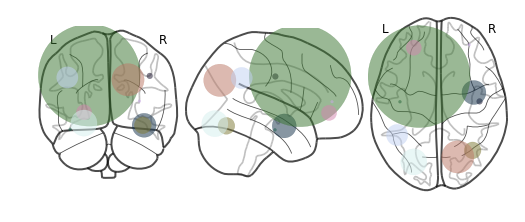

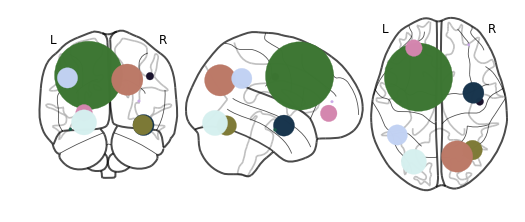

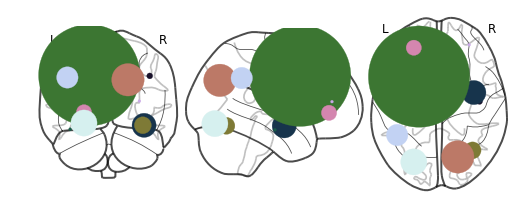

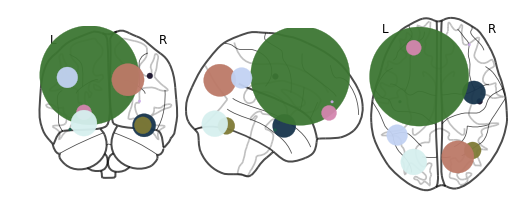

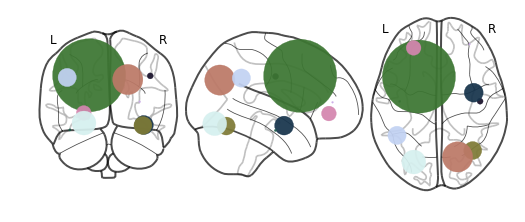

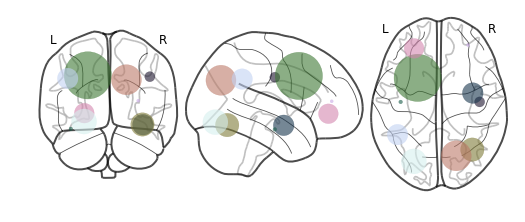

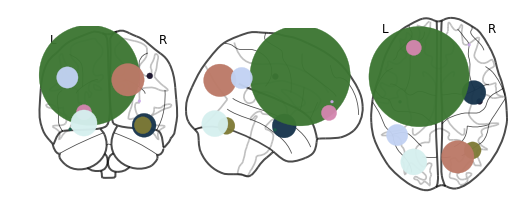

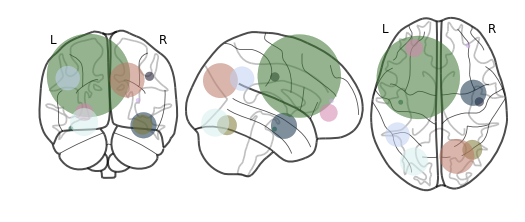

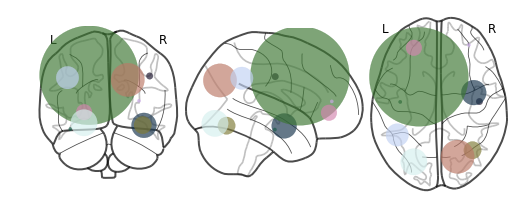

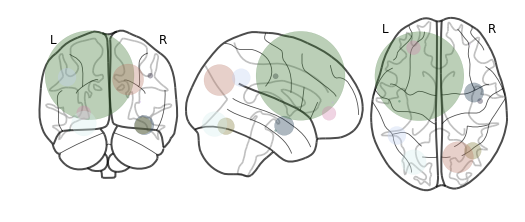

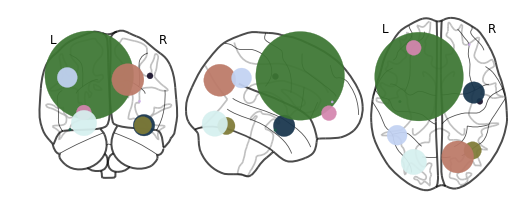

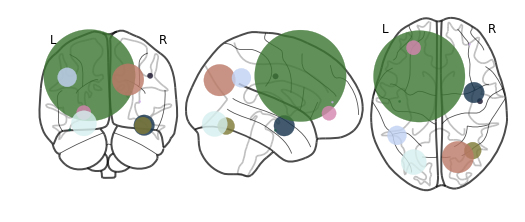

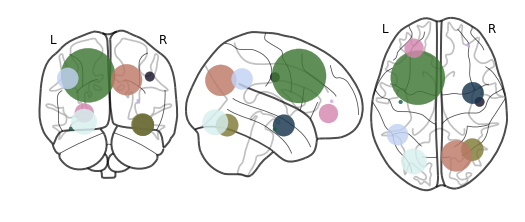

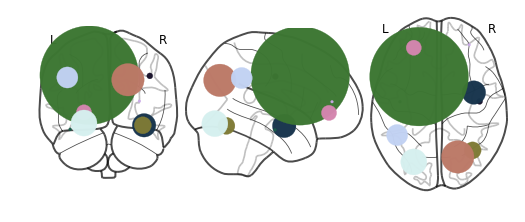

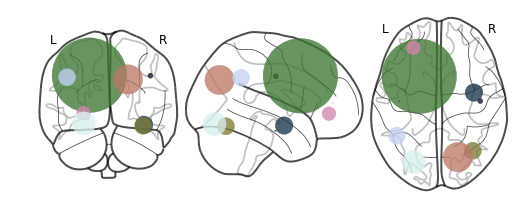

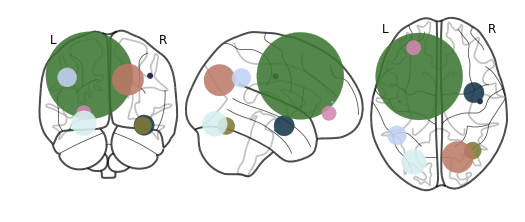

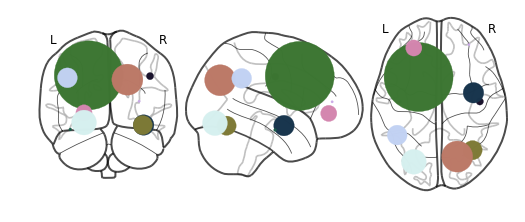

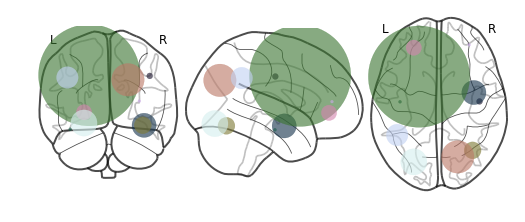

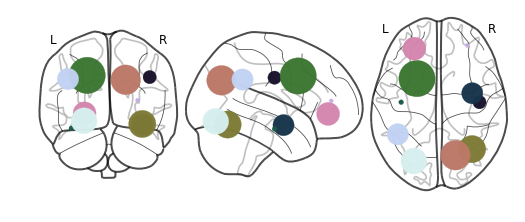

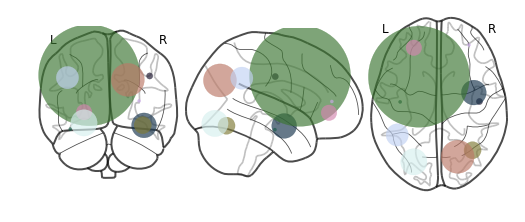

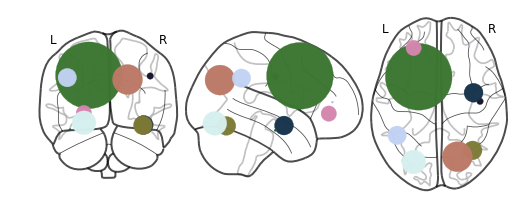

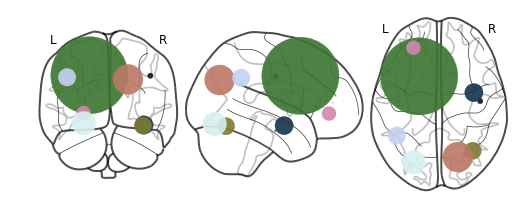

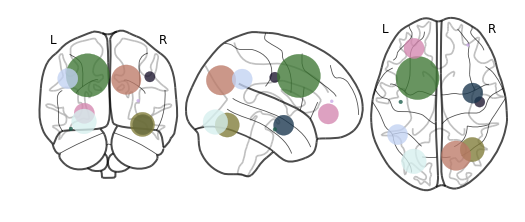

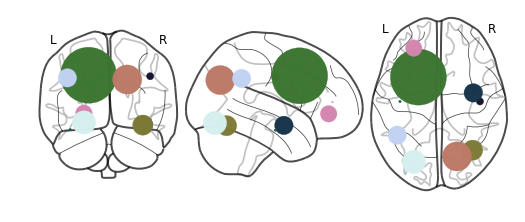

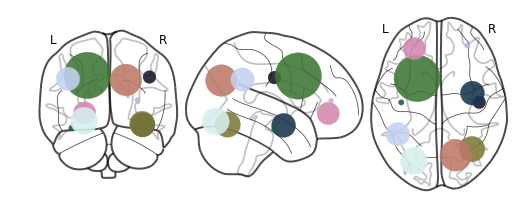

In [8]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


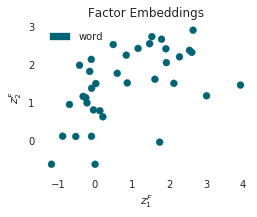

In [9]:
dtfa.scatter_factor_embedding(tasks=['word'])

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


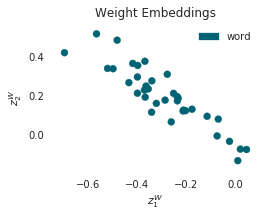

In [10]:
dtfa.scatter_weights_embedding(t=None, tasks=['word'])